In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from scipy.stats import norm
import scipy.stats as stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [18]:
path = '/home/matvey/Документы/Data_Analysis_in_Biology_and_Medicine/Практика в росспотребнадзоре'

In [19]:
df = pd.read_csv(f'{path}/test.csv')
df

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [20]:
df = df.iloc[:60]

In [21]:
df_scale = df / 100
df_scale

,x,y
0,0.77,0.797752
1,0.21,0.231773
2,0.22,0.256093
3,0.20,0.178574
4,0.36,0.418499
5,0.15,0.098052
6,0.62,0.588747
7,0.95,0.976179
8,0.20,0.183951
9,0.05,0.087467


In [22]:
data_in_dict_form = df_scale.T.to_dict('list')
data_in_dict_form

{0: [0.77, 0.7977515201],
 1: [0.21, 0.23177278869999998],
 2: [0.22, 0.2560926156],
 3: [0.2, 0.17857388130000001],
 4: [0.36, 0.4184986439],
 5: [0.15, 0.09805234876],
 6: [0.62, 0.5887465933],
 7: [0.95, 0.9761793701000001],
 8: [0.2, 0.18395127469999997],
 9: [0.05, 0.08746747654],
 10: [0.04, 0.02811415826],
 11: [0.19, 0.17095372409999998],
 12: [0.96, 0.9514907176],
 13: [0.62, 0.6138800663],
 14: [0.36, 0.4024701716],
 15: [0.15, 0.1482248589],
 16: [0.65, 0.6695806869],
 17: [0.14, 0.1663507984],
 18: [0.87, 0.9065513735999999],
 19: [0.69, 0.7722982636000001],
 20: [0.89, 0.9211906277999999],
 21: [0.51, 0.4691387709],
 22: [0.89, 0.8982634441999999],
 23: [0.27, 0.21713803469999998],
 24: [0.97, 0.9741206981],
 25: [0.58, 0.5701631363],
 26: [0.79, 0.7831056542],
 27: [0.21, 0.191315097],
 28: [0.93, 0.9303483387999999],
 29: [0.27, 0.2659112396],
 30: [0.99, 0.9755155344],
 31: [0.31, 0.3143524822],
 32: [0.33, 0.3512724777],
 33: [0.8, 0.7861042432],
 34: [0.28, 0.33071128

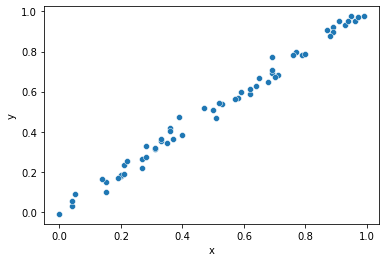

In [23]:
fig = sns.scatterplot(data=df_scale, x="x", y="y")

In [161]:
std_list = [0.1, 0.5, 2]
std_list

[0.1, 0.5, 2]

In [162]:
std_a = 0.5
std_b = 1

In [163]:
a = np.linspace(0.5, 1, num=200)

In [164]:
len(a)

200

In [165]:
a

array([0.5       , 0.50251256, 0.50502513, 0.50753769, 0.51005025,
       0.51256281, 0.51507538, 0.51758794, 0.5201005 , 0.52261307,
       0.52512563, 0.52763819, 0.53015075, 0.53266332, 0.53517588,
       0.53768844, 0.54020101, 0.54271357, 0.54522613, 0.54773869,
       0.55025126, 0.55276382, 0.55527638, 0.55778894, 0.56030151,
       0.56281407, 0.56532663, 0.5678392 , 0.57035176, 0.57286432,
       0.57537688, 0.57788945, 0.58040201, 0.58291457, 0.58542714,
       0.5879397 , 0.59045226, 0.59296482, 0.59547739, 0.59798995,
       0.60050251, 0.60301508, 0.60552764, 0.6080402 , 0.61055276,
       0.61306533, 0.61557789, 0.61809045, 0.62060302, 0.62311558,
       0.62562814, 0.6281407 , 0.63065327, 0.63316583, 0.63567839,
       0.63819095, 0.64070352, 0.64321608, 0.64572864, 0.64824121,
       0.65075377, 0.65326633, 0.65577889, 0.65829146, 0.66080402,
       0.66331658, 0.66582915, 0.66834171, 0.67085427, 0.67336683,
       0.6758794 , 0.67839196, 0.68090452, 0.68341709, 0.68592

In [183]:
b = np.linspace(0, 0.5, num=200)

In [184]:
len(b)

200

In [185]:
b

array([0.        , 0.00251256, 0.00502513, 0.00753769, 0.01005025,
       0.01256281, 0.01507538, 0.01758794, 0.0201005 , 0.02261307,
       0.02512563, 0.02763819, 0.03015075, 0.03266332, 0.03517588,
       0.03768844, 0.04020101, 0.04271357, 0.04522613, 0.04773869,
       0.05025126, 0.05276382, 0.05527638, 0.05778894, 0.06030151,
       0.06281407, 0.06532663, 0.0678392 , 0.07035176, 0.07286432,
       0.07537688, 0.07788945, 0.08040201, 0.08291457, 0.08542714,
       0.0879397 , 0.09045226, 0.09296482, 0.09547739, 0.09798995,
       0.10050251, 0.10301508, 0.10552764, 0.1080402 , 0.11055276,
       0.11306533, 0.11557789, 0.11809045, 0.12060302, 0.12311558,
       0.12562814, 0.1281407 , 0.13065327, 0.13316583, 0.13567839,
       0.13819095, 0.14070352, 0.14321608, 0.14572864, 0.14824121,
       0.15075377, 0.15326633, 0.15577889, 0.15829146, 0.16080402,
       0.16331658, 0.16582915, 0.16834171, 0.17085427, 0.17336683,
       0.1758794 , 0.17839196, 0.18090452, 0.18341709, 0.18592

Создание матрицы для L

aposter_list = list()
for i, a_i in enumerate(a):
    aposter = list()
    for j, b_j in enumerate(b):
        numerator_i_j = 1
        for z, point in data_in_dict_form.items():
            numerator_i_j *= norm.pdf(point[1] - a_i * point[0] - b_j, 0, std) * norm.pdf(a_i, 0, std) * norm.pdf(b_j, 0, std)
        aposter.append(numerator_i_j)
    aposter_list.append(aposter)

In [ ]:
aposter_list

Так как получили маленькие значения, прологарифмируем

In [32]:
aposter_log_list_by_std = list()
for k, std in enumerate(std_list):
    aposter_log_list = list()
    for i, a_i in enumerate(a):
        aposter_log = list()
        for j, b_j in enumerate(b):
            numerator_i_j = np.log(norm.pdf(a_i, 0, std_a)) + np.log(norm.pdf(b_j, 0, std_b))
            for z, point in data_in_dict_form.items():
                numerator_i_j += np.log(norm.pdf(point[1] - a_i * point[0] - b_j, 0, std))
            numerator_i_j = np.exp(numerator_i_j)
            aposter_log.append(numerator_i_j)
        aposter_log_list.append(aposter_log)
    aposter_log_list_by_std.append(aposter_log_list)

In [74]:
aposter_log_list_by_std[0]

[[1.2187951932036472e-82,
  6.196396116086511e-81,
  3.033155938457275e-79,
  1.4295436777051722e-77,
  6.487049994198936e-76,
  2.8342893565674558e-74,
  1.1923074346810958e-72,
  4.829247273645921e-71,
  1.8832924256944532e-69,
  7.071364132264675e-68,
  2.5564409646583766e-66,
  8.898472446875299e-65,
  2.982237844718959e-63,
  9.623127044134864e-62,
  2.98976660615173e-60,
  8.943458155316064e-59,
  2.5758513524179955e-57,
  7.14304259643543e-56,
  1.9071849371469495e-54,
  4.902860101690486e-53,
  1.2135378309961849e-51,
  2.892039785284315e-50,
  6.635938185649387e-49,
  1.4660457583156272e-47,
  3.118457608709733e-46,
  6.386740768892824e-45,
  1.2594062908370256e-43,
  2.3911099838877026e-42,
  4.370995631984049e-41,
  7.693222929255854e-40,
  1.3037171762570367e-38,
  2.127186570326145e-37,
  3.341757279730904e-36,
  5.054653017212105e-35,
  7.361306809404358e-34,
  1.0322041830286637e-32,
  1.3935528238923935e-31,
  1.8114584703694725e-30,
  2.2671510340383364e-29,
  2.731993

In [44]:
len(aposter_log_list_by_std)

3

Версия только с правдоподобием

aposter_log_list_likelihood = list()
for i, a_i in enumerate(a):
    aposter_log = list()
    for j, b_j in enumerate(b):
        numerator_i_j = 0
        for z, point in data_in_dict_form.items():
            numerator_i_j += np.log(norm.pdf(point[1] - a_i * point[0] - b_j, 0, std))
        numerator_i_j = np.exp(numerator_i_j)
        aposter_log.append(numerator_i_j)
    aposter_log_list_likelihood.append(aposter_log)

In [33]:
yname = list()
for i in range(0, 200, 5):
    yname.append(i)

In [34]:
xname = list()
for i in range(0, 196, 4):
    xname.append(i)

<AxesSubplot:>

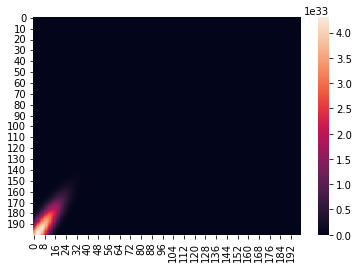

In [35]:
sns.heatmap(aposter_log_list_by_std[0])

<AxesSubplot:>

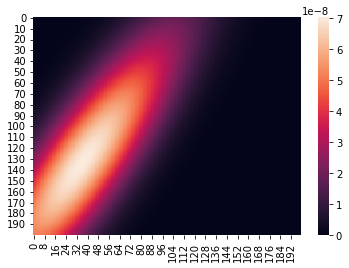

In [36]:
sns.heatmap(aposter_log_list_by_std[1])

<AxesSubplot:>

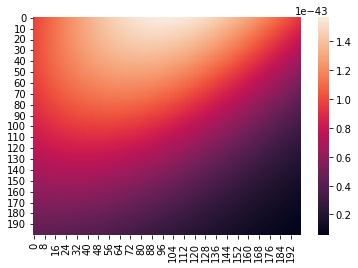

In [37]:
sns.heatmap(aposter_log_list_by_std[2])

In [186]:
best_a_b = [0, 0, 0, 0]
for i, std_model in enumerate(aposter_log_list_by_std):
    for a_i, p_list in enumerate(std_model):
        for b_i, p in enumerate(p_list):
            if p > best_a_b[2]:
                best_a_b[2] = p
                best_a_b[1] = a[a_i]
                best_a_b[0] = b[b_i]
                best_a_b[3] = std_list[i]

In [187]:
best_a_b

[0.007537688442211055, 0.9974874371859297, 4.302647498754869e+33, 0.1]

In [199]:
aposter_for_b = list()
for i in aposter_log_list_by_std[0]:
    aposter_for_b.append(sum(i))

TypeError: unhashable type: 'list'

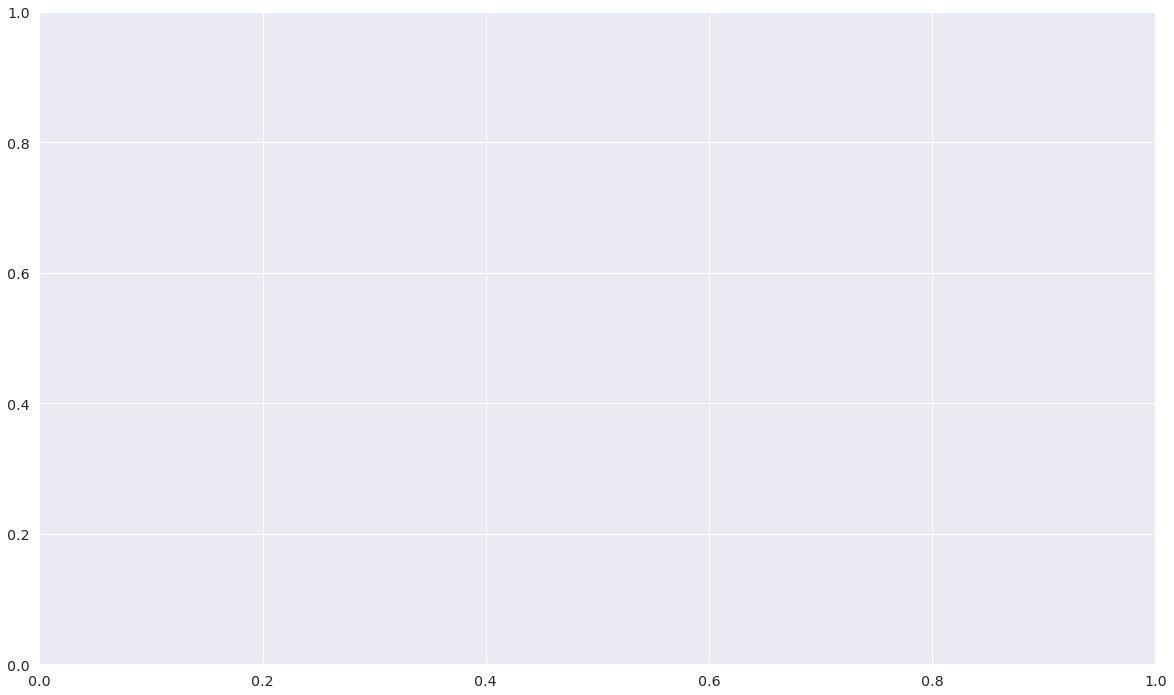

In [195]:
sns.scatterplot(x=b_distrib[0], y=b_distrib[1])

In [61]:
round(MAP_for_a[0], 3)

0.802

In [158]:
round(MAP_for_b[0], 3)

0.118

In [139]:
aposter_for_b = list()
for i in aposter_log_list_by_std[0]:
    aposter_for_b.append(sum(i))

In [140]:
aposter_for_a = list()
for j, a_j in enumerate(a):
    sum_for_a = list()
    for i in aposter_log_list_by_std[0]:
        sum_for_a.append(i[j])
    aposter_for_a.append(sum(sum_for_a))

In [141]:
len(a)

200

MAP-оценка

In [142]:
MAP_for_a = [0, 0]
for i, a_i in enumerate(a):
    if aposter_for_a[i] > MAP_for_a[0]:
        MAP_for_a[1] = aposter_for_a[i]
        MAP_for_a[0] = a_i
print(MAP_for_a)

[0.8417085427135678, 1.372148231630533]


In [143]:
MAP_for_b = [0, 0]
for i, b_i in enumerate(b):
    if aposter_for_b[i] > MAP_for_b[1]:
        MAP_for_b[1] = aposter_for_b[i]
        MAP_for_b[0] = b_i
print(MAP_for_b)

[0.4824120603015075, 4.72028326288461e+34]


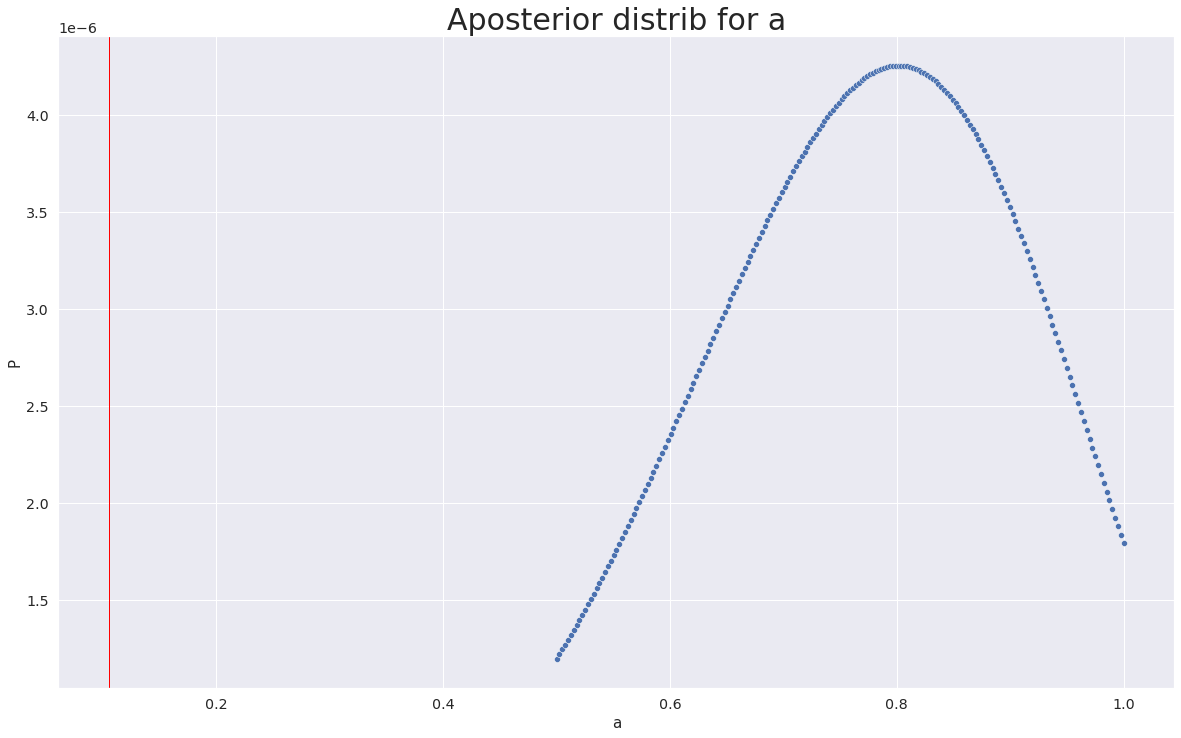

In [118]:
sns.set(rc={'figure.figsize':(20,12)}, font_scale=1.3)
a_scatterplot = sns.scatterplot(x=a, y=aposter_for_a)
a_scatterplot.set_title('Aposterior distrib for a',fontsize=30)
a_scatterplot.set_ylabel("P",fontsize=15)
a_scatterplot.set_xlabel("a",fontsize=15)
plt.axvline(x=MAP_for_b[0], linewidth=1, color='red')
#plt.text(0.25, 2.5, f'MAP = {round(MAP_for_a[0], 3)}')

plt.show()

In [50]:
aposter_for_b = list()
for j, b_j in enumerate(b):
    sum_for_b = list()
    for i in aposter_log_list_by_std[1]:
        sum_for_b.append(i[j])
    aposter_for_b.append(sum(sum_for_b))

In [51]:
len(aposter_for_b)

200

In [52]:
len(b)

200

In [53]:
MAP_for_b = [0, 0]
for i, b_i in enumerate(b):
    if aposter_for_b[i] > MAP_for_b[1]:
        MAP_for_b[1] = aposter_for_b[i]
        MAP_for_b[0] = b_i
print(MAP_for_b)

[0.10552763819095477, 7.189593387504407e-06]


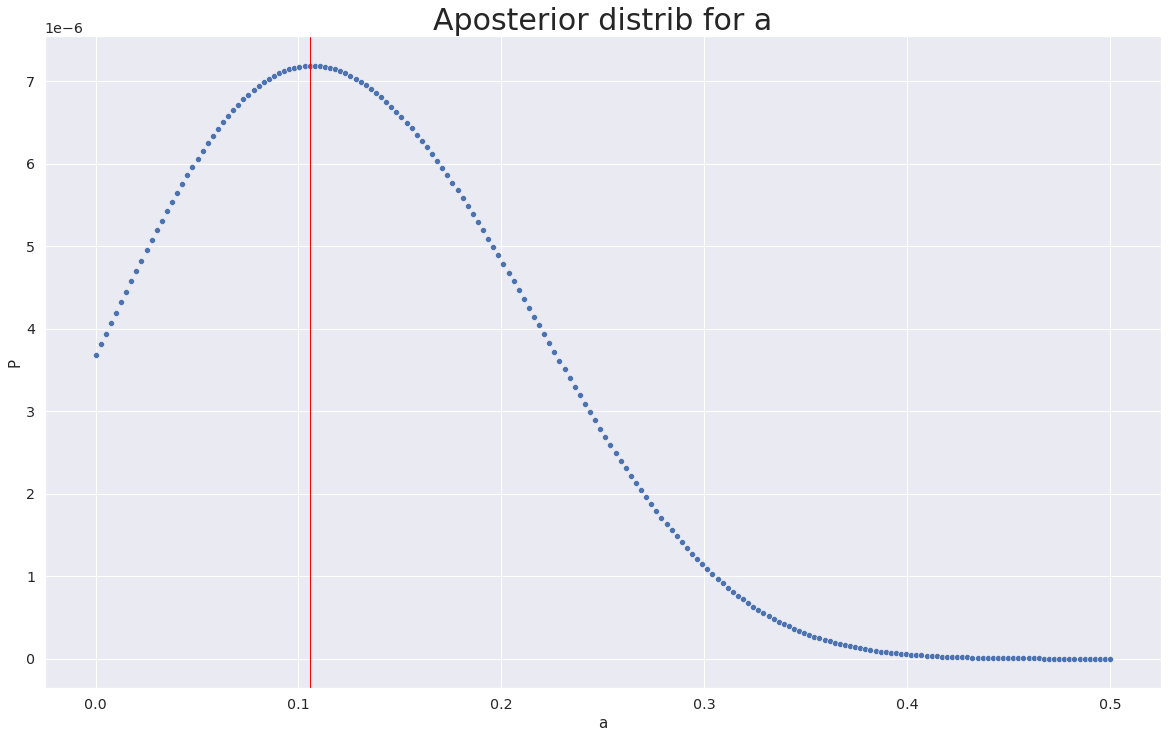

In [54]:
sns.set(rc={'figure.figsize':(20,12)}, font_scale=1.3)

b_scatterplot = sns.scatterplot(x=b, y=aposter_for_b)

b_scatterplot.set_title('Aposterior distrib for b',fontsize=30)
b_scatterplot.set_ylabel("P",fontsize=15)
b_scatterplot.set_xlabel("b",fontsize=15)
plt.axvline(x=MAP_for_b[0], linewidth=1, color='red')
#plt.text(-0.01, 3.6, f'MAP = {round(MAP_for_b[0], 3)}')

plt.show()

Построим регрессионную прямую

In [55]:
len(df_scale.x)

60

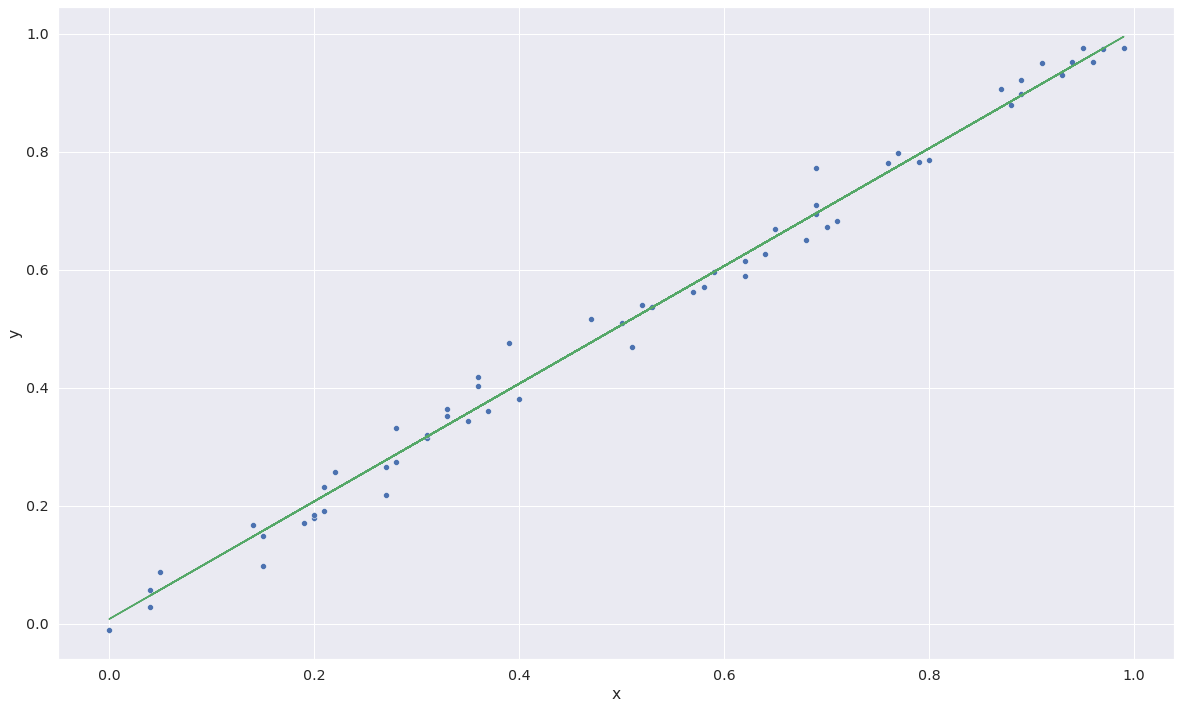

In [56]:
fig = sns.scatterplot(data=df_scale, x="x", y="y")

y_fit_2 = best_a_b[0]*np.array(df_scale.x.to_list())+best_a_b[1]
plt.plot(df_scale.x, y_fit_2, '-g')

#y_fit_3 = best_a_b[0]*np.array(df_scale.x.to_list())+best_a_b[1]
#plt.plot(df_scale.x, y_fit_3, '-y')

In [ ]:
Нарисуем семейство прямых

In [171]:
list_a_b = list()
for i, a_list in enumerate(aposter_log_list_by_std[0]):
    for j, b_in_a in enumerate(a_list):
            a_b = list()
            a_b.append(a[i])
            a_b.append(b[j])
            a_b.append(b_in_a)
            a_b.append(0.1)
            list_a_b.append(a_b)
list_a_b

[[0.5, 0.0, 1.2187951932036472e-82, 0.1],
 [0.5, 0.002512562814070352, 6.196396116086511e-81, 0.1],
 [0.5, 0.005025125628140704, 3.033155938457275e-79, 0.1],
 [0.5, 0.007537688442211055, 1.4295436777051722e-77, 0.1],
 [0.5, 0.010050251256281407, 6.487049994198936e-76, 0.1],
 [0.5, 0.01256281407035176, 2.8342893565674558e-74, 0.1],
 [0.5, 0.01507537688442211, 1.1923074346810958e-72, 0.1],
 [0.5, 0.017587939698492462, 4.829247273645921e-71, 0.1],
 [0.5, 0.020100502512562814, 1.8832924256944532e-69, 0.1],
 [0.5, 0.022613065326633167, 7.071364132264675e-68, 0.1],
 [0.5, 0.02512562814070352, 2.5564409646583766e-66, 0.1],
 [0.5, 0.02763819095477387, 8.898472446875299e-65, 0.1],
 [0.5, 0.03015075376884422, 2.982237844718959e-63, 0.1],
 [0.5, 0.032663316582914576, 9.623127044134864e-62, 0.1],
 [0.5, 0.035175879396984924, 2.98976660615173e-60, 0.1],
 [0.5, 0.03768844221105528, 8.943458155316064e-59, 0.1],
 [0.5, 0.04020100502512563, 2.5758513524179955e-57, 0.1],
 [0.5, 0.04271356783919598, 7.14

In [180]:
list_of_a_and_b = list()
list_of_p = list()
for i in list_a_b:
    list_of_a_and_b.append([i[0], i[1]])
    list_of_p.append(i[2])

In [185]:
len(list_of_a_and_b)

40000

In [184]:
len(list_of_p)

40000

In [187]:
list_of_a_and_b

[[0.5, 0.0],
 [0.5, 0.002512562814070352],
 [0.5, 0.005025125628140704],
 [0.5, 0.007537688442211055],
 [0.5, 0.010050251256281407],
 [0.5, 0.01256281407035176],
 [0.5, 0.01507537688442211],
 [0.5, 0.017587939698492462],
 [0.5, 0.020100502512562814],
 [0.5, 0.022613065326633167],
 [0.5, 0.02512562814070352],
 [0.5, 0.02763819095477387],
 [0.5, 0.03015075376884422],
 [0.5, 0.032663316582914576],
 [0.5, 0.035175879396984924],
 [0.5, 0.03768844221105528],
 [0.5, 0.04020100502512563],
 [0.5, 0.04271356783919598],
 [0.5, 0.04522613065326633],
 [0.5, 0.04773869346733668],
 [0.5, 0.05025125628140704],
 [0.5, 0.052763819095477386],
 [0.5, 0.05527638190954774],
 [0.5, 0.05778894472361809],
 [0.5, 0.06030150753768844],
 [0.5, 0.06281407035175879],
 [0.5, 0.06532663316582915],
 [0.5, 0.0678391959798995],
 [0.5, 0.07035175879396985],
 [0.5, 0.0728643216080402],
 [0.5, 0.07537688442211056],
 [0.5, 0.07788944723618091],
 [0.5, 0.08040201005025126],
 [0.5, 0.0829145728643216],
 [0.5, 0.08542713567839

In [188]:
dict_of_a_and_b = dict()
for i, pair in enumerate(list_of_a_and_b):
    dict_of_a_and_b[i] = pair

In [236]:
np.random.choice(list(dict_of_a_and_b.keys()), p=[i/1.236279e36 for i in list_of_p])

ValueError: probabilities do not sum to 1

In [237]:
p = [i/1.236279e36 for i in list_of_p]

In [238]:
p = np.array(p)
p /= p.sum() 

In [242]:
np.random.choice(list(dict_of_a_and_b.keys()), p=p)

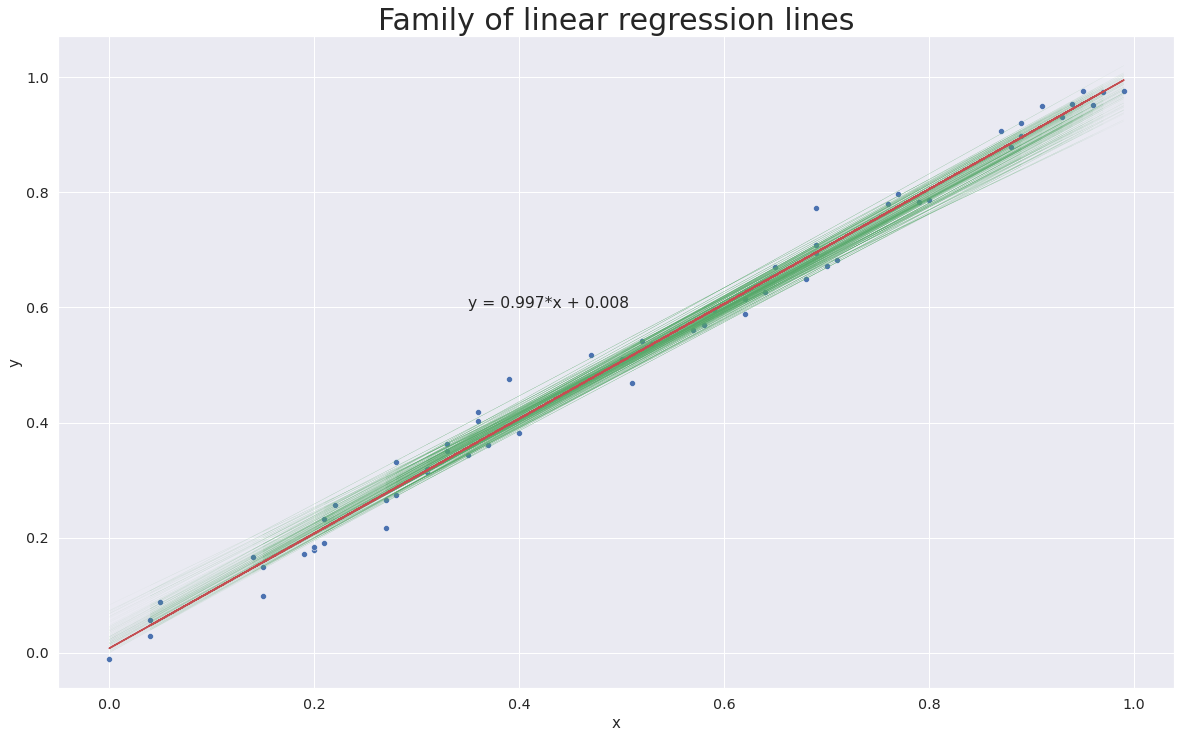

In [266]:
fig = sns.scatterplot(data=df_scale, x="x", y="y")

for i in range(100):
    indx = np.random.choice(list(dict_of_a_and_b.keys()), p=p)
    y_fit_i = dict_of_a_and_b[indx][0]*np.array(df_scale.x.to_list())+dict_of_a_and_b[indx][1]
    plt.plot(df_scale.x, y_fit_i, '-g', linewidth=0.01)
fig.set_title('Family of linear regression lines',fontsize=30)
fig.set_xlabel("x",fontsize=15)
fig.set_ylabel("y",fontsize=15)

y_fit_best = best_a_b[0]*np.array(df_scale.x.to_list())+best_a_b[1]
plt.plot(df_scale.x, y_fit_best, '-r')

plt.text(0.35, 0.6, f'y = {round(best_a_b[0], 3)}*x + {round(best_a_b[1], 3)}')

plt.savefig(f"{path}/Family_of_linear_regression_lines.png")

Попробуем рассчитать полное пространство событий. Для одной точки это сумма совместных вероятностей для всех возможных пар a и b. 

In [67]:
divider_for_all_points = list()
for z, point in data_in_dict_form.items():
    divider_for_one_points = list()
    for i, a_i in enumerate(a):
        for j, b_j in enumerate(b):
            divider_i_j = norm.pdf(point[1] - a_i * point[0] - b_j, 0, std) * norm.pdf(a_i, 0, std) * norm.pdf(b_j, 0, std)
            divider_for_one_points.append(divider_i_j)
    divider_for_all_points.append(divider_for_one_points)

KeyboardInterrupt: 

In [ ]:
sum(divider_for_all_points[0])

In [ ]:
norm.pdf(a_i, 0, std) 

In [ ]:
aposter_log_list = list()
for i, a_i in enumerate(a):
    aposter_log = list()
    for j, b_j in enumerate(b):
        denominator_i_j = 0
        for z, point in data_in_dict_form.items():
            denominator_i_j += 

In [ ]:
aposter_log_list = list()
for i, a_i in enumerate(a):
    aposter_log = list()
    for j, b_j in enumerate(b):
        numerator_i_j = 0
        for z, point in data_in_dict_form.items():
            numerator_i_j += np.log(norm.pdf(point[1] - a_i * point[0] - b_j, 0, std)) + np.log(norm.pdf(a_i, 0, std)) + np.log(norm.pdf(b_j, 0, std))
            numerator_i_j = np.exp(numerator_i_j)
        aposter_log.append(numerator_i_j)
    aposter_log_list.append(aposter_log)

## STAN